<a href="https://colab.research.google.com/github/phyllsmoyo/Project_01_ML_Linear_Regression/blob/branch_1/Project_Advertising_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import Libraries**

In [8]:
#Import libraries
import pandas as pd
import numpy as np

#### **Upload the Dataset**

In [9]:
#Import the Dataset into a pandas DataFrame
#!wget 'https://github.com/phyllsmoyo/Projects/blob/branch_1/Advertising%20Budget%20and%20Sales.csv'


In [10]:
df_data = pd.read_csv('/content/Advertising Budget and Sales.csv', index_col=0)

#### **Data Preparation and Understanding**

In [11]:
#View the first 5 records
df_data.head(5)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The dataset has threee features; TV Ads, Radio Ads and Newspaper Ads and the the target is Sales.

In [12]:
#View the size of the dataset
df_data.shape

(200, 4)

In [13]:
#Understand the data by viewing some basic statistical details
perc =[.20, .40, .60, .80]
df_data.describe(percentiles=perc)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
20%,59.180000,7.680000,9.380000,9.700000
40%,119.000000,17.120000,21.320000,11.800000
50%,149.750000,22.900000,25.750000,12.900000
60%,186.060000,27.860000,32.700000,14.800000
80%,228.540000,38.920000,49.640000,18.920000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
#Check if the dataset contains any null values.
df_data.isnull().any()

TV Ad Budget ($)           False
Radio Ad Budget ($)        False
Newspaper Ad Budget ($)    False
Sales ($)                  False
dtype: bool

The Dataset does not have any null values

In [15]:
#View the columns of the dataset
df_data.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [41]:
#Create a feature object from the dataset
X = df_data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']].values
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [42]:
y = df_data[['Sales ($)']].values
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [43]:
print(X.shape, y.shape, sep='\n')

(200, 3)
(200, 1)


In [44]:
#Split Test and Training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

By default the train_test_split will split 75% training and 25% test data.

In [45]:
#view the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(150, 3)
(50, 3)
(150, 1)
(50, 1)


#### **Modeling Training**

**Linear Regression**

In [21]:
#Import the Linear Regression Model
from sklearn.linear_model import LinearRegression

In [22]:
#Initiate the instance of the Linear Regression Model
normalize = False
linreg = LinearRegression(normalize=normalize)

In [46]:
#Train the Model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Print the intercept and the coefficients
print('The Intercept is: {}'.format(linreg.intercept_))
print('The Coefficients are: {}'.format(linreg.coef_))

The Intercept is: [3.09401086]
The Coefficients are: [[0.04585077 0.17764264 0.00247669]]


In [48]:
#Prediction
y_pred = linreg.predict(X_test)
y_pred[0:5]

array([[17.21150199],
       [16.81441379],
       [21.90735108],
       [24.58034087],
       [12.22742501]])

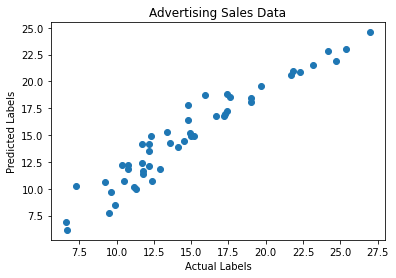

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()

array([17.4])

#### **Model Evaluation**

In [26]:
#Test the Model's accuracy
#import the library
from sklearn import metrics

In [27]:
#Calculate the Metrics
#Mean Squared Error
MSE = metrics.mean_squared_error(y_test, y_pred)
#Root Mean Squared Error
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)
#Mean Absolute Error
MAE = metrics.mean_absolute_error(y_test, y_pred)
#R-Squared
R2 = metrics.r2_score(y_test, y_pred)

In [29]:
print('Mean Squared Error: {}'.format(MSE))
print('Root Mean Squared Error: {}'.format(RMSE))
print('Mean Absolute Error: {}'.format(MAE))
print('R Squared: {}'.format(R2))

Mean Squared Error: 2.0906416277008044
Root Mean Squared Error: 1.4459051240315888
Mean Absolute Error: 1.1532385280495925
R Squared: 0.9157191830180074


**R-squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

Based on R squared this means that our model is **91.572%** accurate.

Also the other metrics are small meaning that the model is doing well in predicting using unseen data.

### **Experiment with other Algorithms**

#### **Linear algorithms: Lasso**

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 2.1545880277481486
RMSE: 1.4678515005776807
R2: 0.9131412879031117


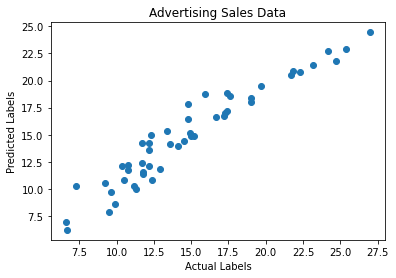

In [56]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso()
model.fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

import matplotlib.pyplot as plt
import numpy as np
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### **Decision Tree Algorithm**

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

|--- feature_0 <= 123.35
|   |--- feature_0 <= 30.05
|   |   |--- feature_0 <= 15.05
|   |   |   |--- feature_0 <= 4.75
|   |   |   |   |--- feature_0 <= 2.40
|   |   |   |   |   |--- value: [1.60]
|   |   |   |   |--- feature_0 >  2.40
|   |   |   |   |   |--- value: [3.20]
|   |   |   |--- feature_0 >  4.75
|   |   |   |   |--- feature_2 <= 50.10
|   |   |   |   |   |--- feature_2 <= 1.55
|   |   |   |   |   |   |--- value: [4.80]
|   |   |   |   |   |--- feature_2 >  1.55
|   |   |   |   |   |   |--- feature_2 <= 5.75
|   |   |   |   |   |   |   |--- value: [5.70]
|   |   |   |   |   |  

MSE: 1.0869999999999995
RMSE: 1.042592921518269
R2: 0.9561793629067942


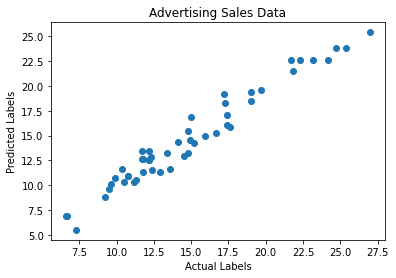

In [59]:
# Evaluate the model using the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### **Ensemble Algorithm**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

MSE: 0.7152329199999999
RMSE: 0.8457144435328038
R2: 0.9711665480915972


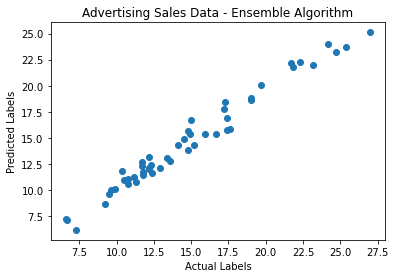

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data - Ensemble Algorithm')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()



#### **Ensemble - Gradient Boosting**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 0.5403100263874695
RMSE: 0.7350578388041784
R2: 0.9782182800513839


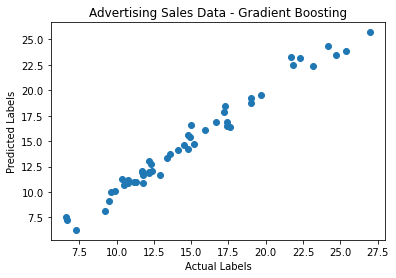

In [64]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data - Gradient Boosting')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Hyperparameter Optimization**


**Gradient Boosting + Grid Search**


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 0.5568508739164271
RMSE: 0.7462244125706603
R2: 0.9775514626854405


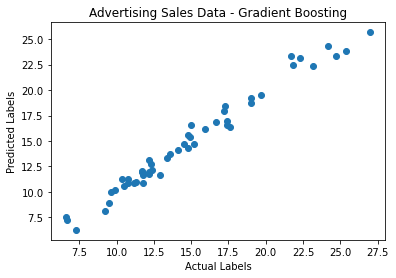

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Advertising Sales Data - Gradient Boosting')
# overlay the regression line
#z = np.polyfit(y_test, y_pred, 1)
#p = np.poly1d(z)
#plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### **Author**

**[Sinothi Moyo](https://www.linkedin.com/in/phyllsmoyo/)**